<a href="https://colab.research.google.com/github/jimsjoo/gilbut_portfolio/blob/master/3%EC%9E%A5_%ED%8F%89%EA%B7%A0_%EB%B6%84%EC%82%B0_%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4_%EC%9D%B4%EB%A1%A0(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


평균-분산 포트폴리오 이론

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib as mpl 

tickers = ['AAPL', 'F', 'AMZN', 'GE', 'TSLA']
pxclose = pd.DataFrame()

for t in tickers:
    pxclose[t] = web.DataReader(t, data_source='yahoo',start='01-01-2019', end='31-12-2019')['Adj Close']

In [0]:
ret_daily = pxclose.pct_change()
ret_annual = ret_daily.mean() * 250
cov_daily = ret_daily.cov()
cov_annual = cov_daily * 250

In [0]:
ret_daily.head()

,AAPL,F,AMZN,GE,TSLA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.01519,-0.025242,0.001242,-0.031472
2019-01-04,0.042689,0.03856,0.050064,0.021092,0.057697
2019-01-07,-0.002226,0.02599,0.034353,0.061968,0.054361
2019-01-08,0.019063,0.00965,0.016612,-0.020595,0.001164


In [0]:
print(cov_annual.head())

          AAPL         F      AMZN        GE      TSLA
AAPL  0.068048  0.021624  0.035169  0.032125  0.042293
F     0.021624  0.074516  0.022533  0.039544  0.016574
AMZN  0.035169  0.022533  0.051708  0.030574  0.032658
GE    0.032125  0.039544  0.030574  0.161524  0.047065
TSLA  0.042293  0.016574  0.032658  0.047065  0.237425


In [0]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

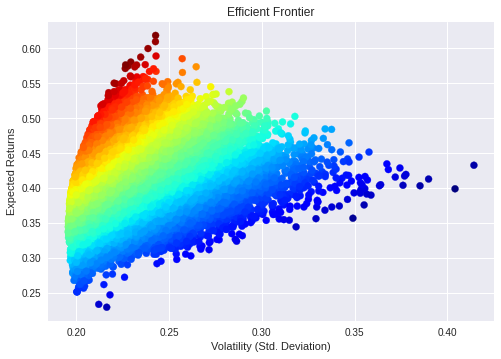

In [0]:
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [0]:
from scipy.optimize import minimize

def obj_variance(weights, cov):
    return np.sqrt(weights.T @ covmat @ weights)

In [0]:
covmat=cov_daily*250
weights =np.array([0.2, 0.2, 0.2, 0.2, 0.2])
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) 
res = minimize(obj_variance, weights,(covmat), method='SLSQP', bounds=bnds, constraints=cons)

In [0]:
print(res)

     fun: 0.19535982197128807
     jac: array([0.19517163, 0.19553576, 0.19532277, 0.1952732 , 0.19548151])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.20785645, 0.29963691, 0.42386206, 0.02998708, 0.0386575 ])


In [0]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

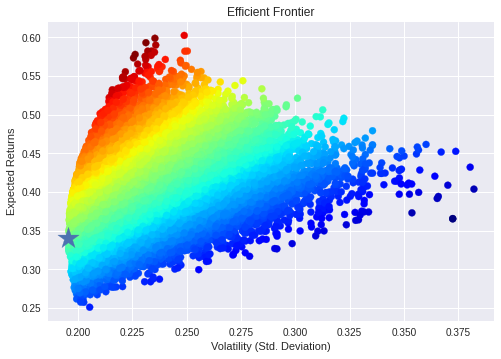

In [0]:
rets = np.sum(ret_daily.mean() * res['x']) * 250
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

# Sharpe ratio 최적화

In [0]:
from scipy.optimize import minimize

def obj_sharpe(weights, returns, covmat, rf):
    ret = np.dot(weights, returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(covmat, weights)))
    return 1/((ret-rf)/np.sqrt(vol))

In [0]:
n_assets = len(tickers)
covmat=cov_daily*250
rf = 0.01
weights = np.ones([n_assets])/n_assets
bnds = tuple((0., 1.) for i in range(n_assets))
cons = ({'type': 'eq', 'fun': lambda w:  np.sum(w) - 1}) 
res = minimize(obj_sharpe, weights,(ret_annual, covmat, rf), method='SLSQP', bounds=bnds, constraints=cons)

In [0]:
print(res)

     fun: 0.7766011520613305
     jac: array([-0.400109  , -0.20859046, -0.04480544, -0.34614632, -0.25100537])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.87350135e-16,
       8.67361738e-18])


In [0]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

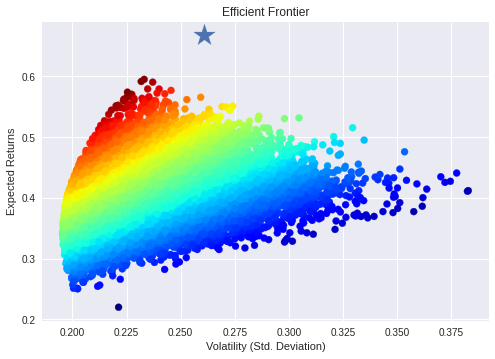

In [0]:
rets = np.sum(ret_daily.mean() * res['x']) * 250
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()